# Assignment 3 - Supervised Learning

## Zhenhua Wang
Netid:  zw149

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1-e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

(a) $f(x^{(i)}) = \prod_{i = 1}^{N} (\hat y^{(i)})^{y^{(i)}} [1 - \hat y^{(i)}]^{1-y^{(i)}}$

(b) $x^{(i)}$ is the i-th observation of X. $y^{(i)}$ is the i-th observation of Y. $\hat y^{(i)}$ is the prediction for $x^{(i)}$

1. $\hat y^{(i)} = \sigma(\mathbf{w}^T \mathbf{x}^{(i)})$

2. $\mathbf{C}(w) = -\frac{1}{N}\sum_{i = 1}^{N} log f(x^{(i)}) = - \frac{1}{N} \sum_{i = 1}^{N} \big[ y^{(i)} log(\hat y^{(i)}) + (1 - y^{(i)})log(1-\hat y^{(i)}) \big]$

The vectorized version: $\mathbf{C}(w) = -\frac{1}{N}Y^T log(\hat Y) - (1-Y)^T log(1 - \hat Y)$

(c) 

1. $\frac{\partial \hat y^{(i)}}{\partial w} = \hat y^{(i)} (1 - \hat y^{(i)})x^{(i)}$

2. $\nabla_{\mathbf{w}}C\\
\quad = -\frac{1}{N}\sum_{i = 1}^{N} \big[ \frac{y^{(i)}}{\hat y^{(i)}}\frac{\partial \hat y^{(i)}}{\partial w} - \frac{1-y^{(i)}}{1 - \hat y^{(i)}}\frac{\partial \hat y^{(i)}}{\partial w}\big]\\
\quad = -\frac{1}{N}\sum_{i = 1}^{N} \big[ (y^{(i)} - \hat y^{(i)}) x^{(i)} \big]\\
\quad = \frac{1}{N}\sum_{i = 1}^{N} \big[ (\hat y^{(i)} - y^{(i)}) x^{(i)} \big]\\
\quad = \left[ \frac{1}{N}\sum_{i = 1}^{N}\big[ (\hat y^{(i)} - y^{(i)}) x^{(i)}_{0} \big], \frac{1}{N}\sum_{i = 1}^{N}\big[ (\hat y^{(i)} - y^{(i)}) x^{(i)}_{1} \big], \frac{1}{N}\sum_{i = 1}^{N}\big[ (\hat y^{(i)} - y^{(i)}) x^{(i)}_{2} \big] \right]$ where $x^{(i)}_{j}$ is the i-th observation, j-th feature of X

(d)

$\mathbf{w} = \mathbf{w} - \eta \frac{1}{N}\sum_{i = 1}^{N} \big[ (\hat y^{(i)} - y^{(i)}) x^{(i)} \big]$

The vectorized version: $\mathbf{w} = \mathbf{w} - \eta \frac{1}{N}X^T(\hat Y - Y)$

In [347]:
# (e)
import pandas as pd
data = pd.read_csv("./data/A3_Q1_data.csv")
x = data[["x1", "x2"]].values
y = data["y"].values

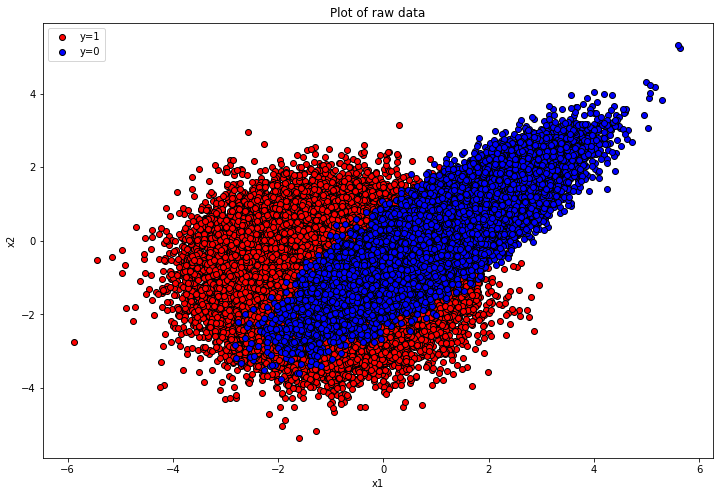

In [348]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
y1_s = plt.scatter(x[y == 1, 0], x[y == 1, 1], c="r", edgecolors="black", label = "y=1")
y2_s = plt.scatter(x[y == 0, 0], x[y == 0, 1], c="b", edgecolors="black", label = "y=0")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot of raw data")
plt.legend()
plt.show()

As we can see from the plot above, the data from two different classes are not separabal. #######Why logistic#######

In [349]:
# (f)
print("number of missing in each variable: ")
print(data.isnull().sum())
data.describe()

number of missing in each variable: 
x1    0
x2    0
y     0
dtype: int64


,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


As my code suggests, there is no missing value. However, the scale is different(e.g. x1's mean is 0.04, whereas x2's mean is -0.39). I would try normalize the data.

In [350]:
# (g)
from math import e
import numpy as np

class LogisticReg:
    def __init__(self):
        self.w = None
        self.train_cost_history = []
        self.test_cost_history = []
        self.e = None
    def sigmoid(self, z):
        return 1 / (1 + e**(-z))
    def cost(self, X, Y):
        num = len(Y)
        Y_hat = self.sigmoid(X.dot(self.w))
        c = - Y.T.dot(np.log(Y_hat)) - (1-Y).T.dot(np.log(1- Y_hat))
        return c / num
    
    def gradient(self, X, Y):
        Y_hat = self.sigmoid(X.dot(self.w))
        return (1/len(Y)) * X.T.dot(Y_hat - Y)
    
    def fit(self, x_train, y_train, x_test, y_test, lr, epoch=500, show_hist=True):
        # initialize weight
        self.w = np.random.rand(x_train.shape[1])
        
        self.e = 0
        while self.e <= epoch:
            current_w = self.w
            
            # cost
            c_train = self.cost(X=x_train, Y=y_train)
            c_test = self.cost(X=x_test, Y=y_test)
            self.train_cost_history.append(c_train)
            self.test_cost_history.append(c_test)
            
            if (self.e+1) % 50 == 0 and show_hist:
                print("epoch: {}, current train cost: {} , test cost: {}".format(self.e+1, c_train, c_test))
                pass
            
            # training
            y_hat = self.sigmoid(x_train.dot(self.w))
            grad = self.gradient(x_train, y_train)
            self.w = current_w - lr * grad
            
            self.e += 1
            if self.e != 0 and np.abs(np.linalg.norm(self.w, ord=2) - np.linalg.norm(current_w, ord=2)) < 1e-06:
                break
            pass
        print("trianing finished!")
        pass
    
    def predict(self, x):
        return self.sigmoid(x.dot(self.w))

In [351]:
# partition data
shuffle = np.arange(len(y))
np.random.shuffle(shuffle)

x = x[shuffle]
y = y[shuffle]

x_train_og = x[:70000]
y_train_og = y[:70000]

x_test_og = x[70000:]
y_test_og = y[70000:]

mu = x_train_og.mean(axis=0)
sig = x_train_og.std(axis=0)
x_train = (x_train_og - mu) / sig
x_test = (x_test_og - mu) / sig

# add bias term
x_train = np.column_stack((np.ones(len(x_train)),
                          x_train))
x_test = np.column_stack((np.ones(len(x_test)),
                          x_test))
y_train = y_train_og.copy()
y_test = y_test_og.copy()



In [352]:
logreg = LogisticReg()
logreg.fit(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr = 0.1)

epoch: 50, current train cost: 0.452570051148023 , test cost: 0.45530531885850867
epoch: 100, current train cost: 0.38024556630055895 , test cost: 0.38371367593327066
epoch: 150, current train cost: 0.35684865072215494 , test cost: 0.3605080652404129
epoch: 200, current train cost: 0.34556937502814666 , test cost: 0.3492796278197703
epoch: 250, current train cost: 0.33916918492465253 , test cost: 0.34288169420893244
epoch: 300, current train cost: 0.33520715906046317 , test cost: 0.33890395646357807
epoch: 350, current train cost: 0.3326190900642981 , test cost: 0.3362941800899515
epoch: 400, current train cost: 0.3308659859471383 , test cost: 0.3345183827328499
epoch: 450, current train cost: 0.3296470506363781 , test cost: 0.3332778669335503
epoch: 500, current train cost: 0.32878273529002505 , test cost: 0.3323938890860229
trianing finished!


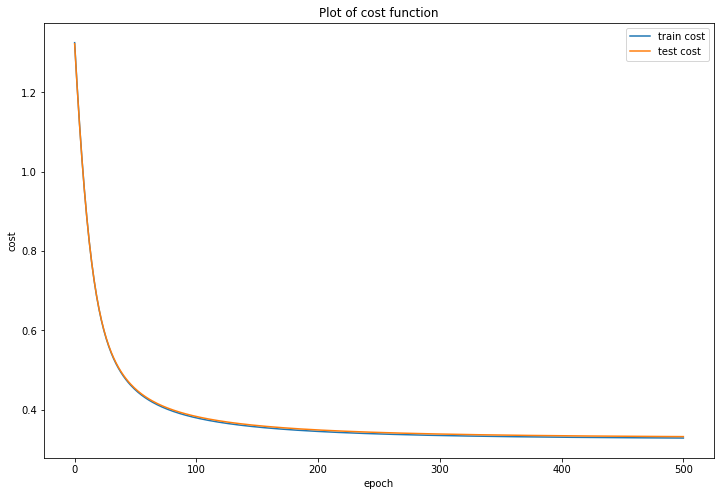

In [353]:
# (j)
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
l_train, = plt.plot(range(logreg.e), logreg.train_cost_history, label = "train cost")
l_test, = plt.plot(range(logreg.e), logreg.test_cost_history, label = "test cost")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Plot of cost function")
plt.legend(handles=[l_train, l_test])
plt.show()

trianing finished!
molde with lr = 0.01 trained! 
trianing finished!
molde with lr = 0.03 trained! 
trianing finished!
molde with lr = 0.06 trained! 
trianing finished!
molde with lr = 0.1 trained! 
trianing finished!
molde with lr = 0.3 trained! 
trianing finished!
molde with lr = 0.6 trained! 
trianing finished!
molde with lr = 1 trained! 
trianing finished!
molde with lr = 2 trained! 
trianing finished!
molde with lr = 5 trained! 
trianing finished!
molde with lr = 7 trained! 
trianing finished!
molde with lr = 8 trained! 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


trianing finished!
molde with lr = 20 trained! 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


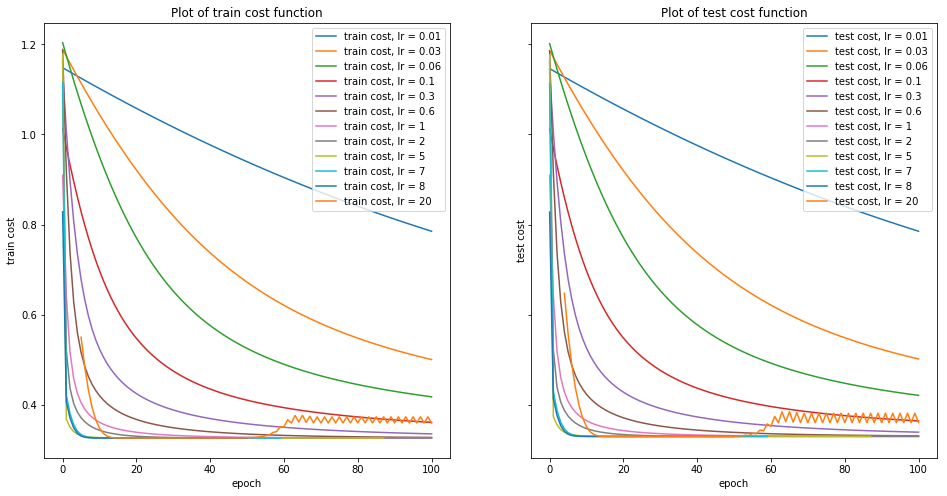

In [354]:
# (k)
lr_list = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 2, 5, 7, 8, 20]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
epoch = 100
for lr in lr_list:
    logreg_lr = LogisticReg()
    logreg_lr.fit(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr = lr, epoch=epoch, show_hist=False)
    
    print("molde with lr = {} trained! ".format(lr))
    
    ax1.plot(range(logreg_lr.e), logreg_lr.train_cost_history, label = "train cost, lr = {}".format(lr))
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("train cost")
    ax1.set_title("Plot of train cost function")
    
    ax2.plot(range(logreg_lr.e), logreg_lr.test_cost_history, label = "test cost, lr = {}".format(lr))
    ax2.set_xlabel("epoch")
    ax2.set_ylabel("test cost")
    ax2.set_title("Plot of test cost function")
ax1.legend()
ax2.legend()
f.show()

##### What is the impact that each parameter has on the process and the results? 
Learning rates controll the speed of updating parameters. As shown in the plots, when learning rate is small, the costs drop slowly (e.g. lr = 0.01, in our case). On the other hand, when learning rate is large, the costs drop fast. But when the learning rate exceeds a certain threshhold, it would go back and forth around the minimum, but never reach to the minimum (e.g. lr = 20, in our case).

##### What choices did you make in your chosen approach and why?
I choose 5 as the learning rate of my model, because our plot of **test** cost function shows that when leanring rate equals 5, it can go to the minimum and its updating speed is the fastest.

trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!


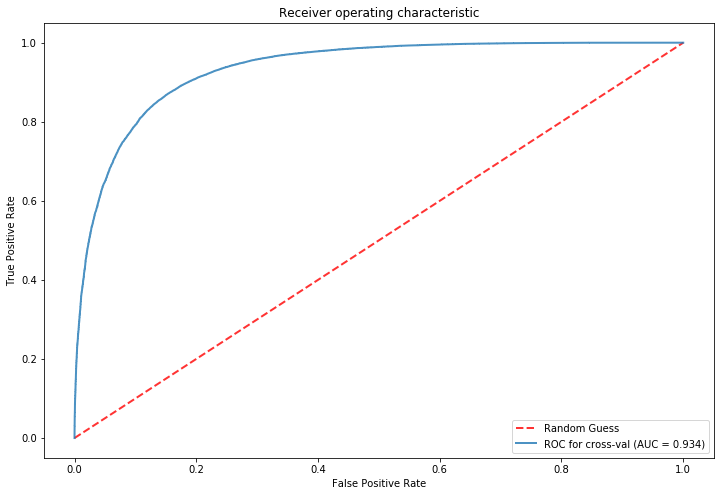

In [355]:
# (i) cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp

skf = StratifiedKFold(n_splits=10)
y_hat = []
y_val_list = []
plt.figure(figsize=(12, 8))

# partition the training data into training and validation set
for tr_index, val_index in skf.split(x_train_og, y_train_og):
    x_tr, x_val = x_train_og[tr_index], x_train_og[val_index]
    y_tr, y_val = y_train_og[tr_index], y_train_og[val_index]
    
    # normalize
    mu = x_tr.mean(axis=0)
    sig = x_tr.std(axis=0)
    x_tr = (x_tr - mu) / sig
    x_val = (x_val - mu) / sig

    # add bias term
    x_tr = np.column_stack((np.ones(len(x_tr)),
                              x_tr))
    x_val = np.column_stack((np.ones(len(x_val)),
                              x_val))
    
    logreg_cv = LogisticReg()
    logreg_cv.fit(x_train=x_tr, y_train=y_tr, x_test=x_val, y_test=y_val, lr = 5, show_hist=False)
    
    y_hat.append(logreg_cv.predict(x_val))
    y_val_list.append(y_val)
    pass

# combine k folds
y_hat_total = np.concatenate(y_hat)
y_val_total = np.concatenate(y_val_list)

# print(y_hat_total.shape, y_val_total.shape)

fpr, tpr, thresholds = roc_curve(y_val_total, y_hat_total)
roc_auc = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random Guess', alpha=.8)

plt.plot(fpr, tpr,
         label='ROC for cross-val (AUC = {:.4})'.format(roc_auc),
         lw=2, alpha=.8)

plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

(m)

##### Why do we use CV？
Cross-validation could use approxmately all training data to train and validate, which is more accurate than simply hold out a validation set.

epoch: 50, current train cost: 0.3263590130311698 , test cost: 0.3298312848797965
trianing finished!


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


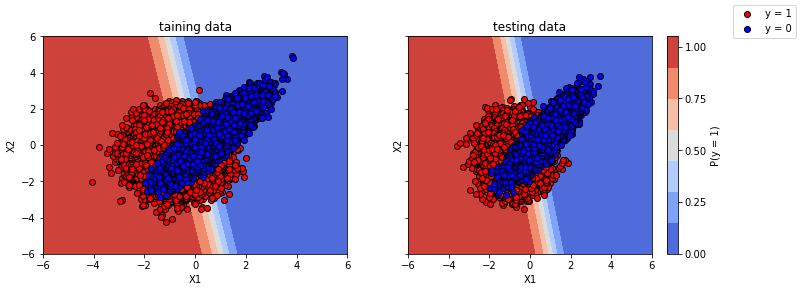

In [356]:
# (n)

# background
x1 = np.linspace(-6, 6, 300)
x2 = np.linspace(-6, 6, 300)

x1v, x2v = np.meshgrid(x1, x2)
X_mesh = np.column_stack((np.ones(len(x1v.ravel())),
                          x1v.ravel(),
                          x2v.ravel()))

logreg = LogisticReg()
logreg.fit(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr = 5)

y_hat_mesh = logreg.predict(X_mesh)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
ax1.contourf(x1v, x2v, y_hat_mesh.reshape(x1v.shape), cmap="coolwarm")
ax1.scatter(x = x_train[y_train == 1,1], y = x_train[y_train == 1,2], c='r', edgecolors="black", label = "y = 1")
ax1.scatter(x = x_train[y_train == 0,1], y = x_train[y_train == 0,2], c='b', edgecolors="black", label = "y = 0")
ax1.set_xlim(x1v.min(), x1v.max())
ax1.set_ylim(x2v.min(), x2v.max())
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_title("taining data")

c2 = ax2.contourf(x1v, x2v, y_hat_mesh.reshape(x1v.shape), cmap="coolwarm")
ax2.scatter(x = x_test[y_test == 1,1], y = x_test[y_test == 1,2], c='r', edgecolors="black")
ax2.scatter(x = x_test[y_test == 0,1], y = x_test[y_test == 0,2], c='b', edgecolors="black")
ax2.set_xlim(x1v.min(), x1v.max())
ax2.set_ylim(x2v.min(), x2v.max())
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title("testing data")
cb = f.colorbar(c2)
cb.set_label("P(y = 1)")
cb.set_ticks([0, .25, .5, .75, 1])
f.legend()
f.show()

##### Comment on your decision boundary. Could it be improved?
The linear boundry does not seem to seperrate the data accurately. Yes, it can be improved. We might try to transform our data(e.g. adding qudratic terms).

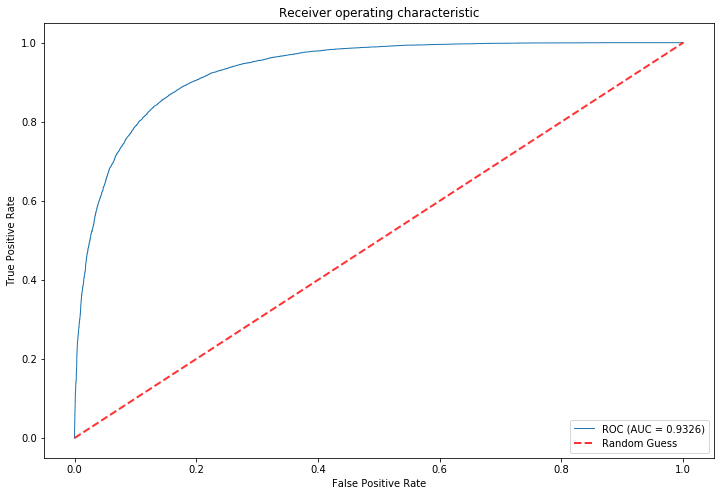

In [357]:
# (o)

y_test_hat = logreg.predict(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_test_hat)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, lw=1, alpha=1,
             label='ROC (AUC = %0.4f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random Guess', alpha=.8)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [358]:
# What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?
print('area under the curve (AUC) = {:.4f}'.format(roc_auc), ", which is far more better than random guess!")

area under the curve (AUC) = 0.9326 , which is far more better than random guess!


## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [359]:
# (a)
import numpy as np
from keras.datasets import mnist
(x_train, y_train_orginal), (x_test, y_test_orginal) = mnist.load_data()

y_train = y_train_orginal.copy()
y_test = y_test_orginal.copy()

y_train[y_train != 3] = 0
y_train[y_train == 3] = 1

y_test[y_test != 3] = 0
y_test[y_test == 3] = 1

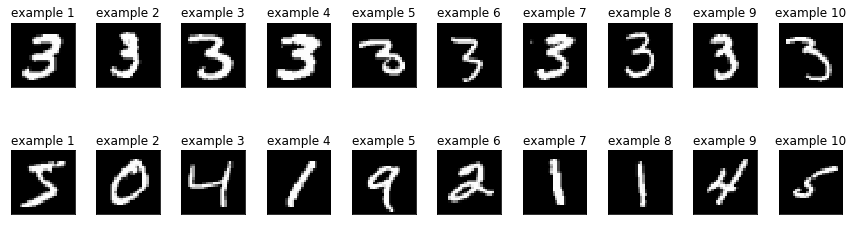

In [360]:
# (b)
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
for i in range(10):
    x_tr1 = x_train[y_train == 1][i]
    x_tr0 = x_train[y_train == 0][i]
    plt.subplot(2, 10, i+1)
    plt.imshow(x_tr1, cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.title("example {}".format(i + 1))
    plt.subplot(2, 10, i+11)
    plt.imshow(x_tr0, cmap="gray")
    plt.title("example {}".format(i + 1))
    plt.yticks([])
    plt.xticks([])
plt.tight_layout()

In [3]:
# (c)
print("We have {0} number of class 1, and {1} number of class 2".format(len(y_train[y_train == 1]), len(y_train[y_train == 0])))

We have 6131 number of class 1, and 53869 number of class 2


##### Are the classes balanced?
The data is not balenced, because the data labeled "3" is only $\frac{1}{10}$ of the original dataset.
##### What issues might this cause?
Machine learning model will be biased by unbiased classes. Model would prefer more common class.

In [173]:
# (d)
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

x_train_ravel = x_train.reshape((len(x_train), 28*28))
x_test_ravel = x_test.reshape((len(x_test), 28*28))

# add bias term
x_train_ravel = np.column_stack((np.ones(len(x_train_ravel)),
                          x_train_ravel))
x_test_ravel = np.column_stack((np.ones(len(x_test_ravel)),
                          x_test_ravel))

skf = StratifiedKFold(n_splits=5)

y_hat = []
y_val_list = []

# partition the training data into training and validation set
for tr_index, val_index in skf.split(x_train_ravel, y_train):
    x_tr, x_val = x_train_ravel[tr_index], x_train_ravel[val_index]
    y_tr, y_val = y_train[tr_index], y_train[val_index]

    logreg_cv = LogisticRegression(solver='saga',
                         tol=5e-2,
                         n_jobs=5, verbose=1).fit(x_tr, y_tr)    
    y_hat.append(logreg_cv.predict_proba(x_val)[:, 1])
    y_val_list.append(y_val)
    pass

# combine k folds
y_hat_total = np.concatenate(y_hat)
y_val_total = np.concatenate(y_val_list)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 10 epochs took 3 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    3.6s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 12 epochs took 4 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    4.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 12 epochs took 4 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    4.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 12 epochs took 4 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    4.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 12 epochs took 4 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    4.4s finished


In [179]:
# all not 3
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, auc

y_hat_not_3 = np.zeros(len(y_test))

# random
y_hat_rand = np.random.randint(2, size=len(y_test))

In [180]:
# logistic regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_val_total, y_hat_total)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_val_total, y_hat_total)

# all not 3
fpr_n3, tpr_n3, thresholds_n3 = roc_curve(y_test, y_hat_not_3)
roc_auc_n3 = auc(fpr_n3, tpr_n3)
precision_n3, recall_n3, thresholds_n3 = precision_recall_curve(y_test, y_hat_not_3)

# random
fpr_rand, tpr_rand, thresholds_rand = roc_curve(y_test, y_hat_rand)
roc_auc_rand = auc(fpr_rand, tpr_rand)
precision_rand, recall_rand, thresholds_rand = precision_recall_curve(y_test, y_hat_rand)

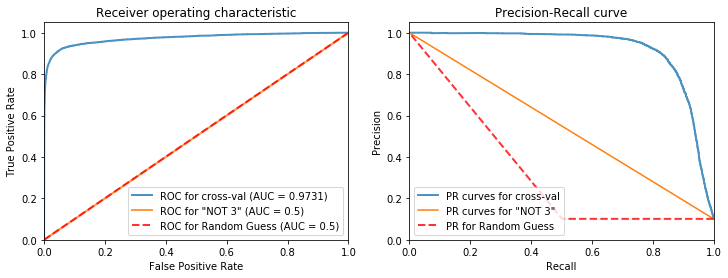

In [181]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr_lr, tpr_lr,
         label='ROC for cross-val (AUC = {:.4})'.format(roc_auc_lr),
         lw=2, alpha=.8)
plt.plot(fpr_n3, tpr_n3,
         label='ROC for "NOT 3" (AUC = {:.4})'.format(roc_auc_n3),
         lw=2, alpha=.8)
plt.plot(fpr_rand, tpr_rand, linestyle='--', lw=2, color='r',
         label='ROC for Random Guess (AUC = 0.5)', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall_lr, precision_lr,
         label='PR curves for cross-val',
         lw=2, alpha=.8)
plt.plot(recall_n3, precision_n3,
        label='PR curves for "NOT 3"')
plt.plot(recall_rand, precision_rand, linestyle='--', lw=2, color='r',
         label='PR for Random Guess', alpha=.8)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

##### Describe the algorithm's performance and explain any discrepancies you find:

As shown in our ROC plots, the AUC for logistic regression model is large than the AUC for the random guess model and the model who predict all new observations to "NOT 3". As a result, logistic regression model works far more better than the random guess model and the model who predict all new observations to "NOT 3". 

Also, the PR curve also indicates the performance of logistic regression model is better than the other two models. This is because the area under the PR curve of logistic regression model is larger than the area of other two models.

In [146]:
# (f)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def cost(Y, Y_hat):
    num = len(Y)
    c = - Y.T.dot(np.log(Y_hat)) - (1-Y).T.dot(np.log(1- Y_hat))
    return c / num

# cross val
skf = StratifiedKFold(n_splits=5)

c_list = [0.00001, 0.00003, 0.00006, 
          0.0001, 0.0003, 0.0006,
          0.001, 0.003, 0.006, 0.008,
          0.01, 0.03, 0.06, 
          0.1, 0.3, 0.6, 1, 2]

non_zero_list = []
cost_list = []
f1_list = []
auc_list = []
for c in c_list:
    clf = LogisticRegression(tol=5e-2,
                            penalty='l1',
                            C = c,
                            n_jobs=5,
                            solver='saga').fit(x_train_ravel, y_train)
    
    y_hat = clf.predict_proba(x_test_ravel)[:, 1]
    log_reg_auc = roc_auc_score(y_test, y_hat)
    non_zero_list.append(np.count_nonzero(clf.coef_))
    cost_list.append(cost(y_test, y_hat))
    auc_list.append(roc_auc_score(y_test, np.where(y_hat>0.5, 1, 0)))
    f1_list.append(f1_score(y_test, np.where(y_hat>0.5, 1, 0)) )
    print("c = {} finished!".format(c))


c = 1e-05 finished!
c = 3e-05 finished!
c = 6e-05 finished!
c = 0.0001 finished!
c = 0.0003 finished!
c = 0.0006 finished!
c = 0.001 finished!
c = 0.003 finished!
c = 0.006 finished!
c = 0.008 finished!
c = 0.01 finished!
c = 0.03 finished!
c = 0.06 finished!
c = 0.1 finished!
c = 0.3 finished!
c = 0.6 finished!
c = 1 finished!
c = 2 finished!


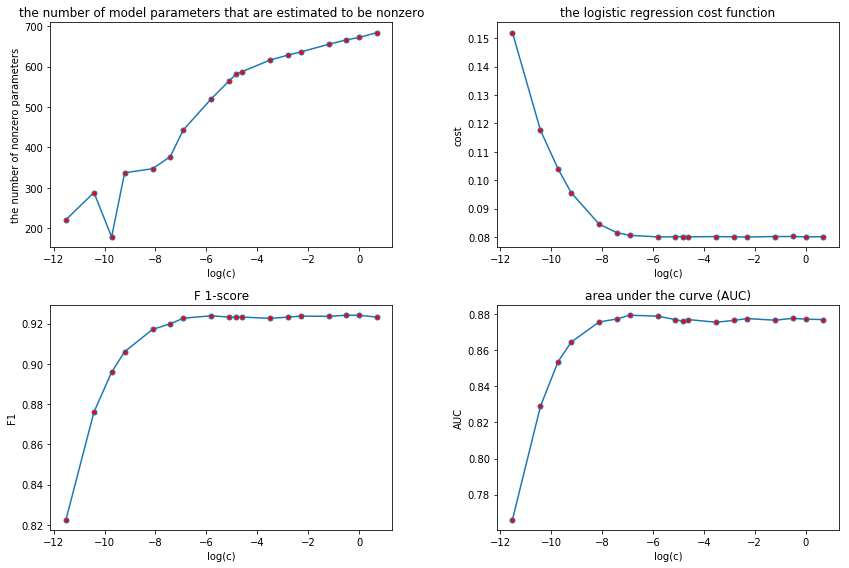

In [145]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(np.log(c_list), non_zero_list, marker='.', markerfacecolor="r", markersize=10)
axes[0, 0].set_title("the number of model parameters that are estimated to be nonzero")
axes[0, 0].set_xlabel("log(c)")
axes[0, 0].set_ylabel("the number of nonzero parameters")
axes[0, 1].plot(np.log(c_list), cost_list, marker='.', markerfacecolor="r", markersize=10)
axes[0, 1].set_title("the logistic regression cost function")
axes[0, 1].set_xlabel("log(c)")
axes[0, 1].set_ylabel("cost")
axes[1, 0].plot(np.log(c_list), auc_list, marker='.', markerfacecolor="r", markersize=10)
axes[1, 0].set_title("F 1-score")
axes[1, 0].set_xlabel("log(c)")
axes[1, 0].set_ylabel("F1")
axes[1, 1].plot(np.log(c_list), f1_list, marker='.', markerfacecolor="r", markersize=10)
axes[1, 1].set_title("area under the curve (AUC)")
axes[1, 1].set_xlabel("log(c)")
axes[1, 1].set_ylabel("AUC")
fig.tight_layout()

##### Findings:

Note: sklearn's document said that smaller values for "C" specify stronger regularization.

1. When the regularization coefficient "C" becomes larger, the number of non-zero parameters will decrease, because larger "C" specifies weak regularization. On the other hands, stronger regularization could set the parameters of some features in our model. As a result, it could ignore some unnecessary features, and make our model less likely to overfit the data.
2. When the regularization is strong, our model could be underfitted to the data, which is shown in the above plots (e.g. high cost, low F1 score and low AUC). This is because when the regularization is too big, all of our parameters tend to become 0, which results in a less powerful model.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a)**

Heart disease is the leading cause of death for both men and women. If people could learn the warining symptoms of heart attack by analysing their own health condition. Then, the chance of surviving from a heart disease would be greatly increased. Therefore, the goal of this project is to build a classification model, which would  classify accurately whether people have heart disease. Since heart disease is an extremely serious problem (the cost of a false negative is huge), we seek to minimize the number of false negatives. Also, if the final classification probability is big than a certain value (e.g. 30%), we could still recommend the patience to do a thorough test.

In [361]:
# (b)
import pandas as pd
heart = pd.read_csv("./data/heart.csv")
display(heart.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From the describing table, we can see that there is no missing value in this dataset and the mean value for response variable (target) is 0.54, which means that there are as equal number of people with heart disease as number of people without heart disease. However, the scale between different predictors is huge; therefore, we need to normalize the data. 

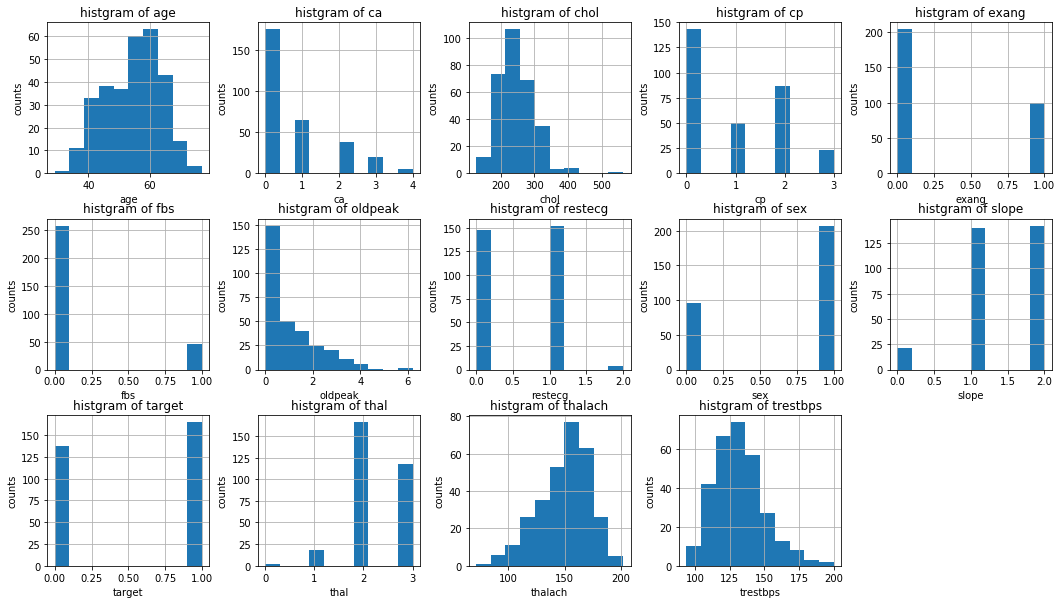

In [362]:
axes = heart.hist(bins=10, figsize=(18,10), layout=(3,5))

for axe in axes.ravel():
    var = axe.get_title()
    axe.set_xlabel(var)
    axe.set_ylabel("counts")
    axe.set_title("histgram of {}".format(var))

The histogram could show the distribution of our data more clearly. The two classes in target variable has almost the same amount of data. Many variables follows a distribution that is close to normal distribution (e.g. "age", "thalach").

In [363]:
heart.iloc[:,:-1].corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


From this pairwise correlation table, we can see that there is not much correlation between predictor

##### C
My target variable is "target" (i.e. whether people have heart disease). The available predictors are "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca" and "thal". 

Since the scales of all the predictors differ significantly, I need to normalize the data

##### D

I would use logistic regression, because I only have 303 examples and the number of predictor is only 14. Therefore, logistic regression, as a simple model, would be enough in this problem. 

##### E

Since this is a classification problem, I would use ROC curves and calculate the area under curve (AUC) to evaluate my model. If AUC is good enough (e.g. bigger than 0.75), I would feel confidence to use this model.

##### F

I seperate the data into training and testing dataset. Then, I run cross-validation on traning data in order to find the best l2 regularization parameter (C=0.009). Then, I train the model on the whole traning data and test it on test set.

In [364]:
x_heart = heart.iloc[:, 0:-1].values
y_heart = heart.iloc[:, -1].values

# partition data
shuffle = np.arange(len(y_heart))
np.random.shuffle(shuffle)

x_heart = x_heart[shuffle]
y_heart = y_heart[shuffle]

x_train_heart = x_heart[50:]
y_train_heart = y_heart[50:]
x_test_heart = x_heart[:50]
y_test_heart = y_heart[:50]

In [377]:
skf = StratifiedKFold(n_splits=10)

y_hat = []
y_val_list = []

# cross val to select predictor
for tr_index, val_index in skf.split(x_train_heart, y_train_heart):
    x_tr, x_val = x_train_heart[tr_index], x_train_heart[val_index]
    y_tr, y_val = y_train_heart[tr_index], y_train_heart[val_index]
    
    mu = x_tr.mean(axis=0)
    sig = x_tr.std(axis=0)
    x_tr = (x_tr - mu) / sig
    x_val = (x_val - mu) / sig

    # add bias term
    x_tr = np.column_stack((np.ones(len(x_tr)),
                              x_tr))
    x_val = np.column_stack((np.ones(len(x_val)),
                              x_val))

    logreg_cv = LogisticRegression(solver='saga',
                                   penalty='l2',
                                   C = 0.009,
                                   n_jobs=5).fit(x_tr, y_tr)    
    y_hat.append(logreg_cv.predict_proba(x_val)[:, 1])
    y_val_list.append(y_val)
    pass

# combine k folds
y_hat_total = np.concatenate(y_hat)
y_val_total = np.concatenate(y_val_list)

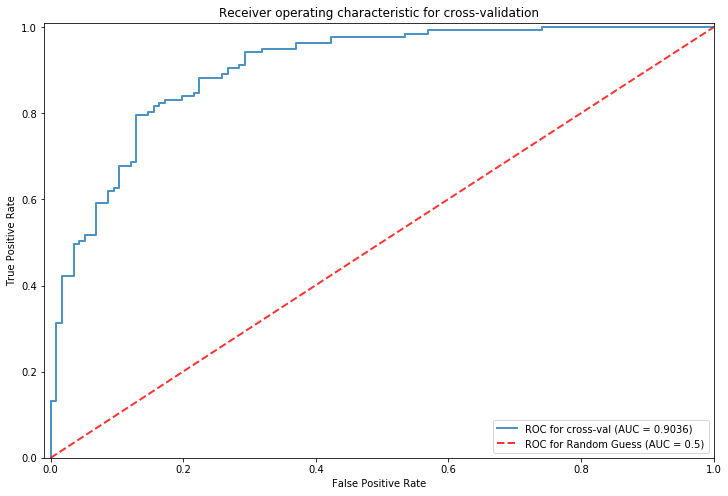

In [378]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_val_total, y_hat_total)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(12, 8))
plt.plot(fpr_lr, tpr_lr,
         label='ROC for cross-val (AUC = {:.4})'.format(roc_auc_lr),
         lw=2, alpha=.8)
plt.plot(fpr_rand, tpr_rand, linestyle='--', lw=2, color='r',
         label='ROC for Random Guess (AUC = 0.5)', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for cross-validation')
plt.ylim([0.0, 1.01])
plt.xlim([-0.01, 1.0])
plt.legend()
plt.show()

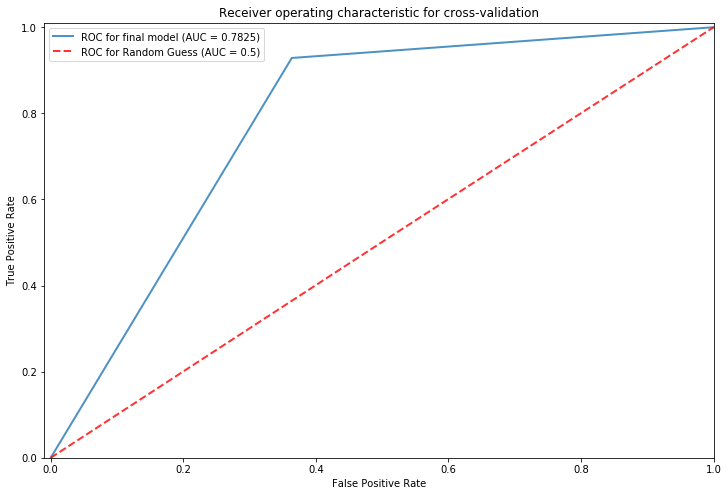

In [389]:
# fit the final model on entire training set
mu = x_train_heart.mean(axis=0)
sig = x_train_heart.std(axis=0)
x_train = (x_train_heart - mu) / sig
x_test = (x_test_heart - mu) / sig

# add bias term
x_train = np.column_stack((np.ones(len(x_train)),
                          x_train))
x_test = np.column_stack((np.ones(len(x_test)),
                          x_test))

logreg = LogisticRegression(solver='saga',
                            penalty='l2',
                            max_iter=10000,
                            C = 0.009,
                            n_jobs=5).fit(x_train, y_train_heart)
y_hat_test = logreg.predict(x_test)

# roc for overall model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_heart, y_hat_test)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(12, 8))
plt.plot(fpr_lr, tpr_lr,
         label='ROC for final model (AUC = {:.4})'.format(roc_auc_lr),
         lw=2, alpha=.8)
plt.plot(fpr_rand, tpr_rand, linestyle='--', lw=2, color='r',
         label='ROC for Random Guess (AUC = 0.5)', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for cross-validation')
plt.ylim([0.0, 1.01])
plt.xlim([-0.01, 1.0])
plt.legend()
plt.show()

##### h

The final model works not perfectly, but still okay to use. The area under the ROC is 0.78 for this model. My model did converge on this dataset and its accuary is also acceptable. But we cannot fully rely on this model. In other words, we need to think carefully before we make decision for the patience. Also, since the cost for a false positive is much less than a false negative in our cases, we may need to set a lower threshold. 

Ideally, if we could collect more data, our model would behave better. Also, if we have more data, we could try more complex model.

##### i

In [416]:
final_model = pd.DataFrame({"names": ["intercept"] + list(heart)[:-1],
                            "Coefficients": logreg.coef_.reshape(14)})
display(final_model)

,names,Coefficients
0,intercept,0.000017
1,age,-0.062146
2,sex,-0.156821
3,cp,0.258782
4,trestbps,-0.083386
5,chol,-0.063744
6,fbs,-0.002260
7,restecg,0.049684
8,thalach,0.195892
9,exang,-0.220588


As we can see from the table above, chest pain (cp) is positive related to the heart disease. So a person with high level of chest pain would be more likely to have a heart disease, with all the other conditions are the same. Maximum heart rate achieved (thalach) also relates to heart disease. people with higher maximum heart rate achieved are more likely to develop a heart disease. High the slope of the peak exercise ST segment (slope) could also indicate having a heart disease.